In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

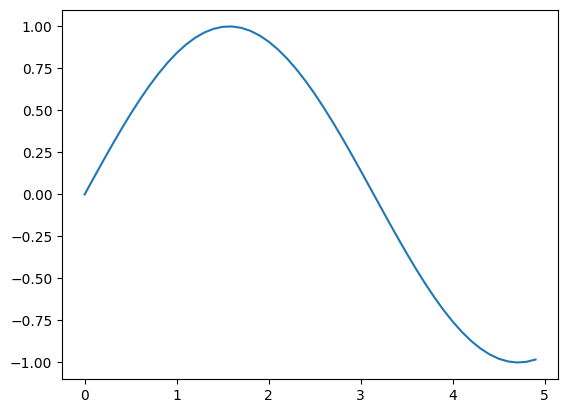

In [ ]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

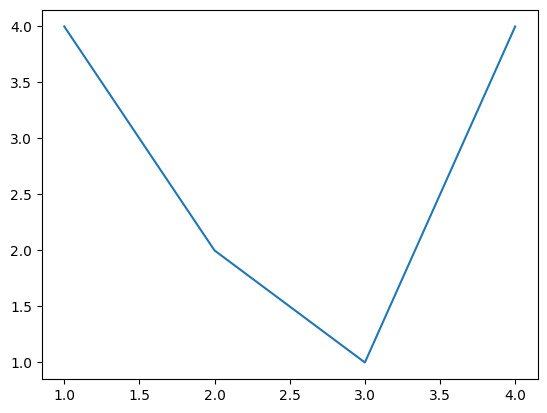

In [ ]:
x = [1, 2, 3, 4]
y = [4, 2, 1, 4]

plt.plot(x, y)
# plt.show()

In [ ]:
df.job_posted_date.head()

,job_posted_date
0,2023-06-16 13:44:15
1,2023-01-14 13:18:07
2,2023-10-10 13:14:55
3,2023-07-04 13:01:41
4,2023-08-07 14:29:36


In [ ]:
df['job_posted_months'] = df.job_posted_date.dt.month

In [ ]:
monthly_counts = df.job_posted_months.value_counts()

monthly_counts = monthly_counts.sort_index()

In [ ]:
# date_counts = df.job_posted_date.value_counts()

# date_counts = date_counts.sort_index()

In [ ]:
monthly_counts

,count
job_posted_months,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


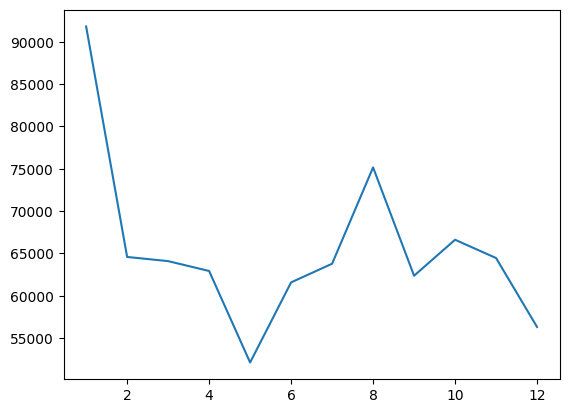

In [ ]:
plt.plot(monthly_counts.index, monthly_counts)

In [ ]:
pd.Series([5, 4, 3, 2, 1], index=['a', 'b', 'c', 'd', 'e'])

,0
a,5
b,4
c,3
d,2
e,1


<BarContainer object of 10 artists>

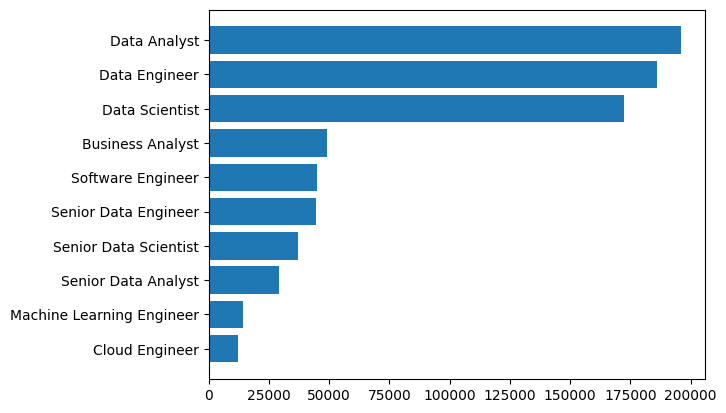

In [ ]:
# df.job_title_short.value_counts().index
# df.job_title_short.value_counts().values

job_counts = df.job_title_short.value_counts()

job_counts = job_counts.sort_values(ascending=True)

plt.barh(job_counts.index, job_counts)

In [ ]:
job_counts = job_counts.sort_values()

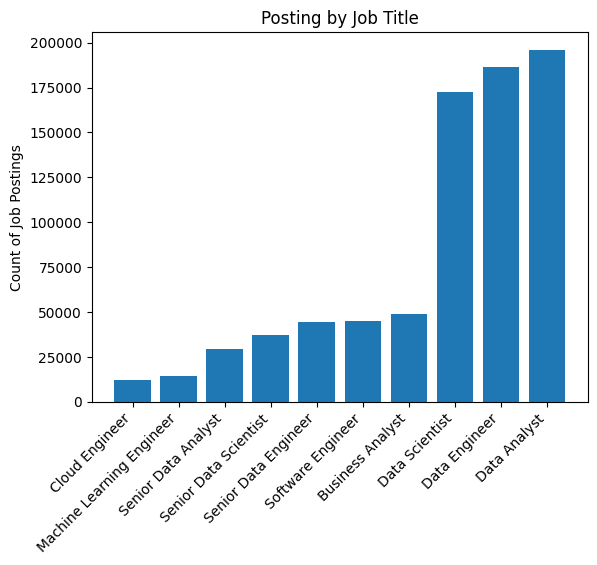

In [ ]:
plt.bar(job_counts.index, job_counts)
plt.title('Posting by Job Title')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
id_jobs = df[df.job_country == "Indonesia"]

In [ ]:
id_job_counts = id_jobs['job_title_short'].value_counts()

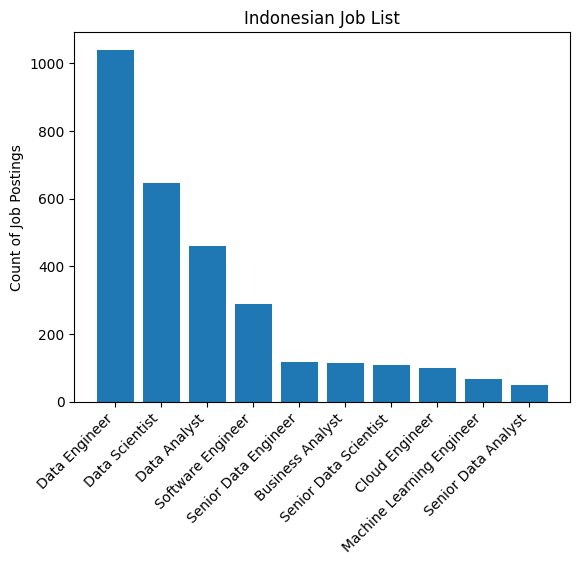

In [ ]:
plt.bar(id_job_counts.index, id_job_counts)
plt.title('Indonesian Job List')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

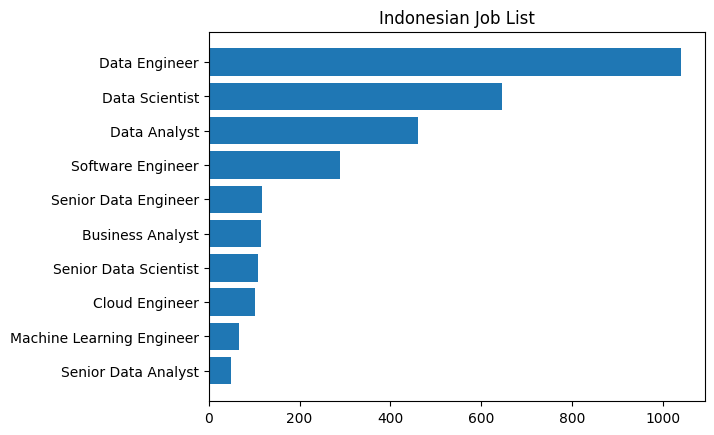

In [ ]:
id_job_counts = id_job_counts.sort_values(ascending=True)
plt.barh(id_job_counts.index, id_job_counts)
plt.title('Indonesian Job List')
plt.show()

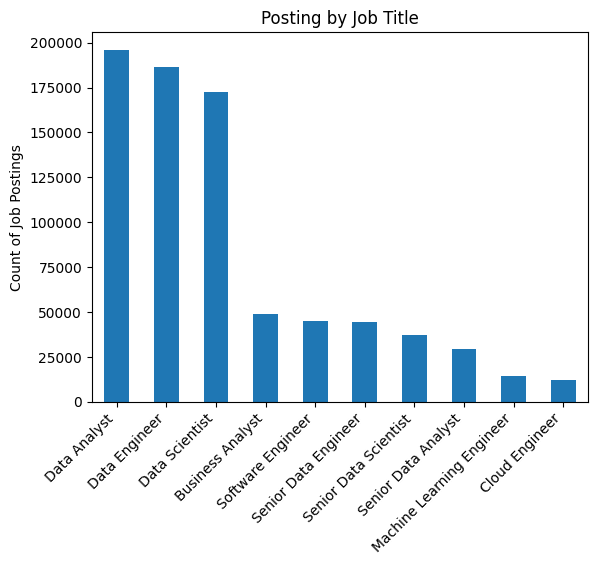

In [ ]:
job_counts = job_counts.sort_values(ascending=False)
job_counts.plot(kind='bar')
plt.title('Posting by Job Title')
plt.xlabel('')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='job_title_short'>

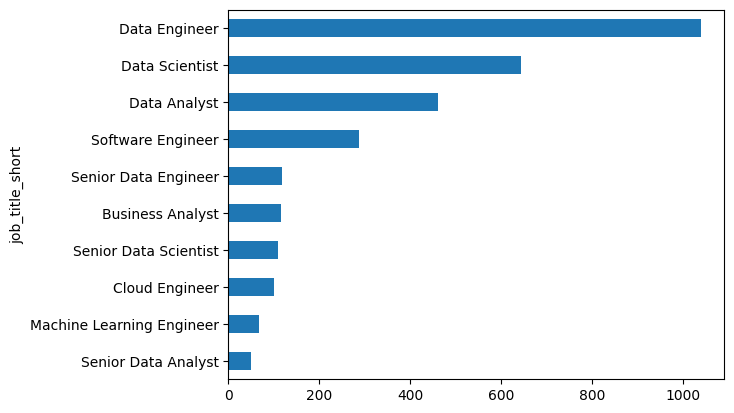

In [ ]:
id_job_counts.plot(kind='barh')

<Axes: xlabel='job_posted_date'>

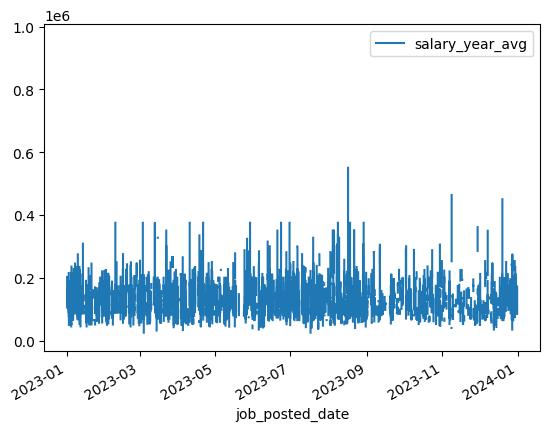

In [ ]:
df = df.sort_values(by='job_posted_date')
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

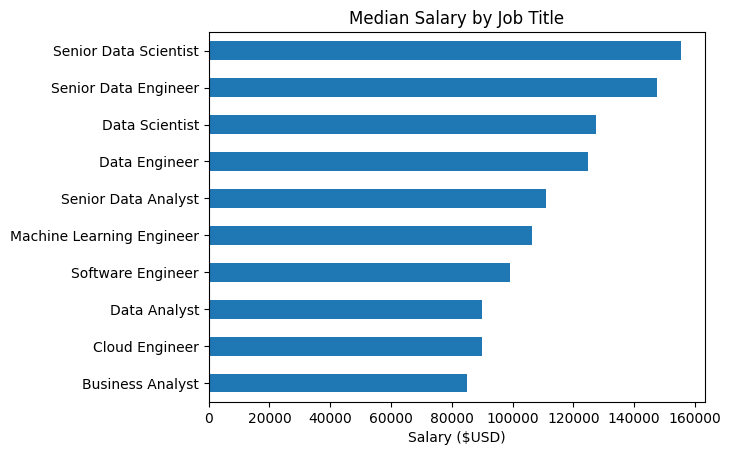

In [ ]:
median_salaries = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True)
median_salaries.plot(kind='barh')
plt.title('Median Salary by Job Title')
plt.xlabel('Salary ($USD)')
plt.ylabel("")
plt.show()

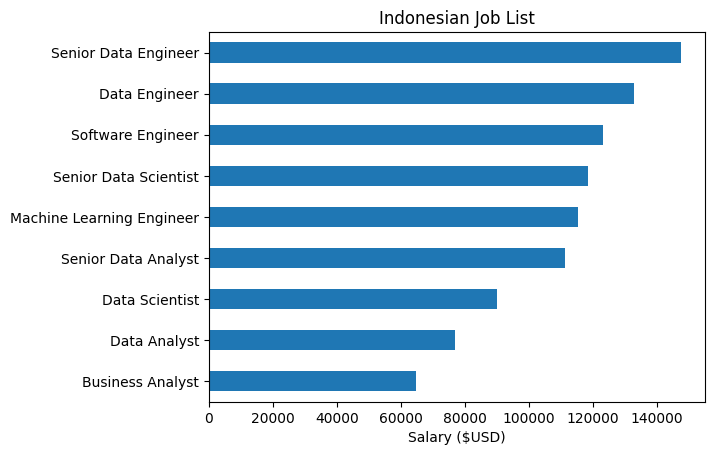

In [ ]:
# id_jobs = df[df.job_country == "Indonesia"]
id_jobs = df[df.job_country == "Indonesia"]
id_jobs = id_jobs.dropna(subset='salary_year_avg') # cleaning data with na value in salary_year_avg
id_job_counts = id_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True)
id_job_counts.plot(kind='barh')
plt.title('Indonesian Job List')
plt.xlabel('Salary ($USD)')
plt.ylabel("")
plt.show()

In [ ]:
# id_jobs[(id_jobs.job_title_short == 'Cloud Engineer') & (id_jobs.salary_year_avg.notna())]
# id_jobs.salary_year_avg.notna().sum()
# ((id_jobs.job_title_short == 'Cloud Engineer') & (id_jobs.salary_year_avg.notna())).any()
# id_jobs[(id_jobs.job_title_short == 'Cloud Engineer') & (id_jobs.salary_year_avg.notna())].empty